errorneg_theta_ML 1.7575757575757578
errorpos_theta_ML 1.4646464646464645
38


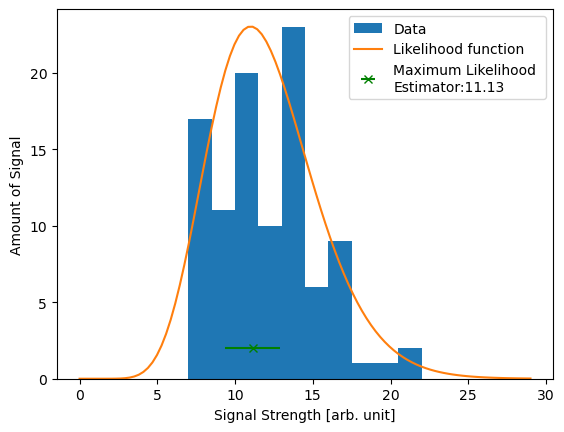

In [1]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)


lamda = 11
size = int(1e2)
#random variables
poisson_draws = poisson.rvs(mu=lamda, size=size)
x = np.arange(poisson.ppf(0.000001, lamda), poisson.ppf(0.999999, lamda))
max_,bins , _ = ax.hist(poisson_draws, label = "Data", )
xinter = np.linspace(x[0], x[-1], 100)
L =   poisson.pmf(k= lamda , mu= xinter, loc=0)
L = L/np.max(L) * max(max_)

theta_ML = np.where(L == np.max(L))[0][0]
errorpos_theta_ML =np.where(L[theta_ML:] <= (np.max(L) - 2)  )
errorpos_theta_ML =  xinter[errorpos_theta_ML[0][0]]

errorneg_theta_ML =np.where(L[:theta_ML] <= (np.max(L) - 2)  )
errorneg_theta_ML = xinter[theta_ML] - xinter[errorneg_theta_ML[0][-1]] 

print("errorneg_theta_ML", errorneg_theta_ML)
print("errorpos_theta_ML", errorpos_theta_ML)
print(theta_ML)

plt.errorbar(x = xinter[theta_ML], y = 2, 
             xerr = (errorneg_theta_ML),
            fmt = 'x',color = 'green', label = f"Maximum Likelihood \nEstimator:{xinter[theta_ML]:.4}")
ax.plot(xinter,  L,
        label='Likelihood function')
plt.xlabel("Signal Strength [arb. unit]")
plt.ylabel("Amount of Signal")

plt.legend()
plt.show()


In [2]:
def Gauss(bins, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))

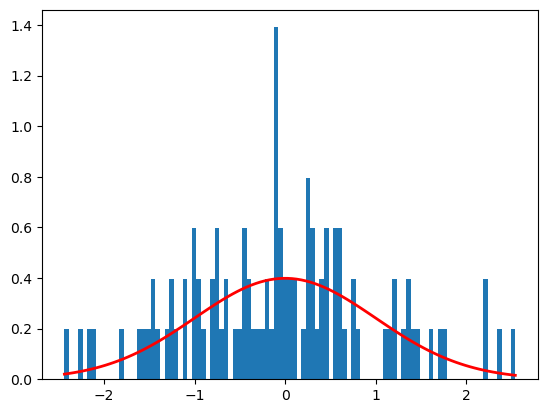

In [3]:
mu, sigma = 0, 1 # mean and standard deviation

sys = np.random.normal(mu, sigma, size)

count, bins, ignored = plt.hist(sys, 99, density=True)
G = Gauss(bins, mu, sigma)
plt.plot(bins, G ,
         linewidth=2, color='r')

plt.show()

[1.33927004e-25 3.21831543e-24 7.09779261e-23 1.43665421e-21
 2.66879638e-20 4.55001550e-19 7.11941906e-18 1.02237562e-16
 1.34744379e-15 1.62984038e-14 1.80931314e-13 1.84338753e-12
 1.72366872e-11 1.47919422e-10 1.16501320e-09 8.42113709e-09
 5.58656523e-08 3.40136514e-07 1.90062258e-06 9.74704021e-06
 4.58758239e-05 1.98166045e-04 7.85613344e-04 2.85839805e-03
 9.54488737e-03 2.92518377e-02 8.22753517e-02 2.12383408e-01
 5.03159490e-01 1.09401934e+00 2.18312484e+00 3.99821728e+00
 6.72029686e+00 1.03668012e+01 1.46769335e+01 1.90704143e+01
 2.27415036e+01 2.48892878e+01 2.50000000e+01 2.30463309e+01
 1.94983483e+01 1.51400775e+01 1.07892839e+01 7.05653317e+00
 4.23569226e+00 2.33341324e+00 1.17975862e+00 5.47430399e-01
 2.33130398e-01 9.11177831e-02 3.26844838e-02 1.07600518e-02
 3.25103271e-03 9.01493420e-04 2.29423568e-04 5.35855562e-05
 1.14866054e-05 2.25979949e-06 4.08020850e-07 6.76128204e-08
 1.02827670e-08 1.43524215e-09 1.83854648e-10 2.16151518e-11
 2.33225597e-12 2.309555

Text(0, 0.5, 'Amount of Signal')

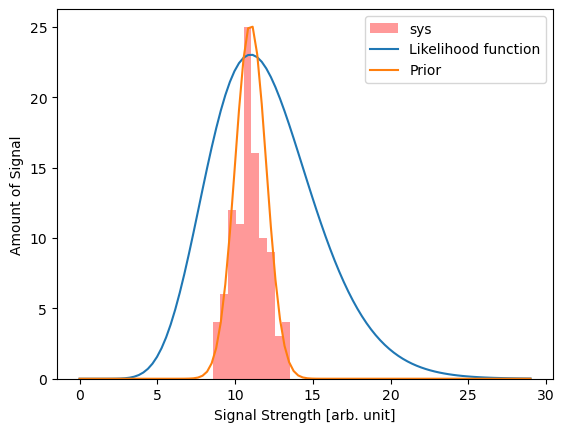

In [4]:
fig, ax = plt.subplots(1, 1)
max_,bins , _ = plt.hist(sys+11, label = "sys", color = 'red' ,
                        alpha = 0.4)

ax.plot(xinter,  L, label='Likelihood function')
G = Gauss(xinter, lamda, sigma)
G = G/np.max(G) * np.max(max_)
print(G)
ax.plot(xinter, G, label='Prior')


plt.legend()
plt.xlabel("Signal Strength [arb. unit]")
plt.ylabel("Amount of Signal")


In [5]:
poisson.rvs(mu=lamda+sys[0], size=1)

array([13])

[14 15 16 20 13 15 12 10  8  8  8  9 13 14  9 12 13  9 15 15 10  9  8 14
 13 11 14 16  9  7  7 13 15 16 13  8 12  8 10  9 18 13  7  9  7 11 11  9
 12  8 10 11 13 16 13 11  7 12 12 13 15 17  9 11  9  7 22 12 11 12 14  8
 17 13 22 14 17 11  7 11 10 12 16 13 14 16 11  8  9 14  8 13 14 13 10 10
 12 10 11 10]
[1.33927004e-25 3.21831543e-24 7.09779261e-23 1.43665421e-21
 2.66879638e-20 4.55001550e-19 7.11941906e-18 1.02237562e-16
 1.34744379e-15 1.62984038e-14 1.80931314e-13 1.84338753e-12
 1.72366872e-11 1.47919422e-10 1.16501320e-09 8.42113709e-09
 5.58656523e-08 3.40136514e-07 1.90062258e-06 9.74704021e-06
 4.58758239e-05 1.98166045e-04 7.85613344e-04 2.85839805e-03
 9.54488737e-03 2.92518377e-02 8.22753517e-02 2.12383408e-01
 5.03159490e-01 1.09401934e+00 2.18312484e+00 3.99821728e+00
 6.72029686e+00 1.03668012e+01 1.46769335e+01 1.90704143e+01
 2.27415036e+01 2.48892878e+01 2.50000000e+01 2.30463309e+01
 1.94983483e+01 1.51400775e+01 1.07892839e+01 7.05653317e+00
 4.23569226e+00 2.33341

Text(0, 0.5, 'Amount of Signal')

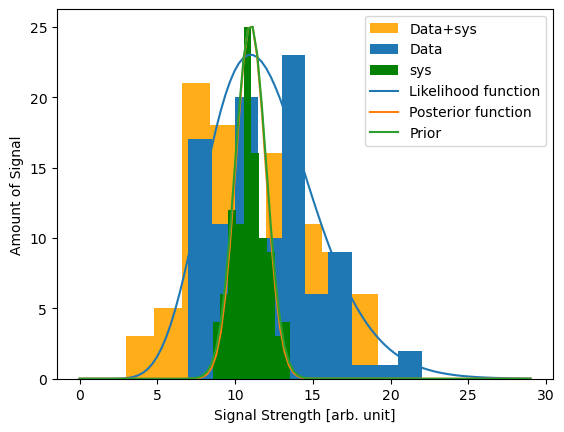

In [6]:
fig, ax = plt.subplots(1, 1)

poisson_draws_sys = []
for i in range((size)):
    p = poisson.rvs(mu=lamda+sys[i], size=1)[0]
    poisson_draws_sys.append(p)

print(poisson_draws)
max_,bins , _ = plt.hist(poisson_draws_sys, label = "Data+sys", color = 'orange' ,
                        alpha = 0.9)
max_,bins , _ = plt.hist(poisson_draws, label = "Data",  color = 'tab:blue')
max_,bins , _ = plt.hist(sys+11, label = "sys", color = 'green' ,alpha = 0.99)

ax.plot(xinter,  L, label='Likelihood function')
G = Gauss(xinter, lamda, sigma)
G = G/np.max(G) * np.max(max_)
print(G)
P = L* G 
P = P/np.max(P) * np.max(max_)
ax.plot(xinter, P, label='Posterior function')
ax.plot(xinter, G, label='Prior')


plt.legend()
plt.xlabel("Signal Strength [arb. unit]")
plt.ylabel("Amount of Signal")


In [7]:
G

array([1.33927004e-25, 3.21831543e-24, 7.09779261e-23, 1.43665421e-21,
       2.66879638e-20, 4.55001550e-19, 7.11941906e-18, 1.02237562e-16,
       1.34744379e-15, 1.62984038e-14, 1.80931314e-13, 1.84338753e-12,
       1.72366872e-11, 1.47919422e-10, 1.16501320e-09, 8.42113709e-09,
       5.58656523e-08, 3.40136514e-07, 1.90062258e-06, 9.74704021e-06,
       4.58758239e-05, 1.98166045e-04, 7.85613344e-04, 2.85839805e-03,
       9.54488737e-03, 2.92518377e-02, 8.22753517e-02, 2.12383408e-01,
       5.03159490e-01, 1.09401934e+00, 2.18312484e+00, 3.99821728e+00,
       6.72029686e+00, 1.03668012e+01, 1.46769335e+01, 1.90704143e+01,
       2.27415036e+01, 2.48892878e+01, 2.50000000e+01, 2.30463309e+01,
       1.94983483e+01, 1.51400775e+01, 1.07892839e+01, 7.05653317e+00,
       4.23569226e+00, 2.33341324e+00, 1.17975862e+00, 5.47430399e-01,
       2.33130398e-01, 9.11177831e-02, 3.26844838e-02, 1.07600518e-02,
       3.25103271e-03, 9.01493420e-04, 2.29423568e-04, 5.35855562e-05,
      

[11.12023199  8.32372495 10.35610137 18.14598928  5.94872027  5.76768245
  6.18852871  5.53251678 10.34863433 14.4266746 ]


(array([  4.,  24.,  88., 196., 246., 229., 158.,  39.,  15.,   1.]),
 array([-3.25649848, -2.57787033, -1.89924217, -1.22061401, -0.54198585,
         0.1366423 ,  0.81527046,  1.49389862,  2.17252677,  2.85115493,
         3.52978309]),
 <BarContainer object of 10 artists>)

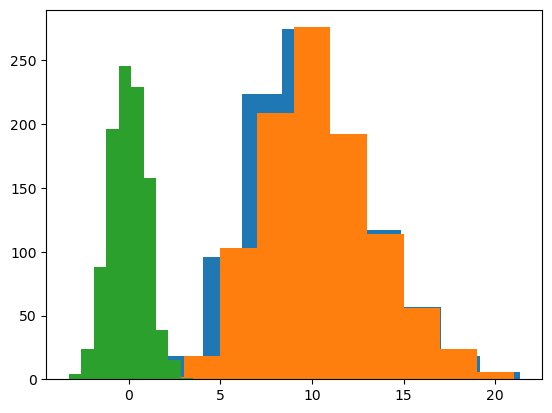

In [11]:
import numpy as np

# Set the value of lambda
lam = 10

# Generate Poisson-distributed random numbers
poisson_data = np.random.poisson(lam, size=1000)

# Generate normally-distributed random numbers
gaussian_data = np.random.normal(size=1000)

# Add the two sets of random numbers together
simulated_data = poisson_data + gaussian_data

# Print the first 10 values of the simulated data
print(simulated_data[:10])
plt.hist(simulated_data)
plt.hist(poisson_data)
plt.hist(gaussian_data)